# Medical Cost Personal Datasets

age — возраст основного бенефициара;<br/>
sex — пол страхового подрядчика;<br/>
bmi — индекс массы тела (), в идеале — от 18.5 до 24.9;<br/>
children — количество детей, охваченных медицинской страховкой;<br/>
smoker — является ли человек курящим;<br/>
region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);<br/>
charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Исследование данных

In [6]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
#Создаем копию данных для облегчения работы с изменениями в таблице
temp_data = data.copy()

In [8]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

### Зависимость целевого признака от числовых факторов

Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 

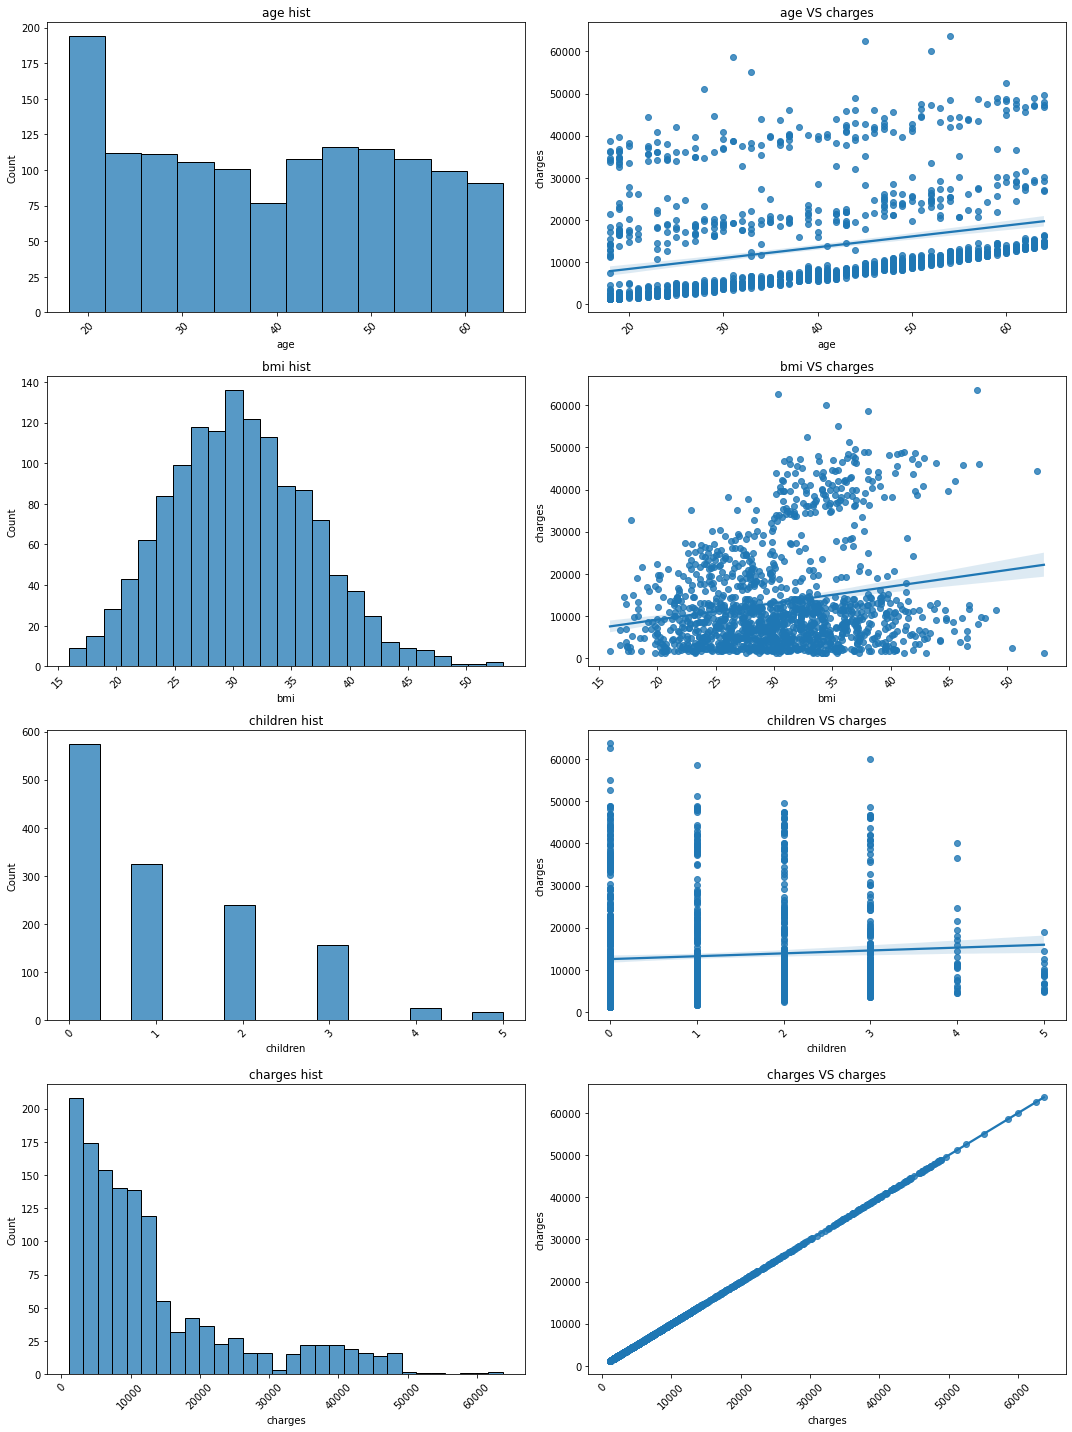

In [9]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS charges'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

### Зависимость медианного значения целевого признака от категориальных факторов

In [10]:
cat_features = list(types[(types == 'object')].index)
cat_features

['sex', 'smoker', 'region']

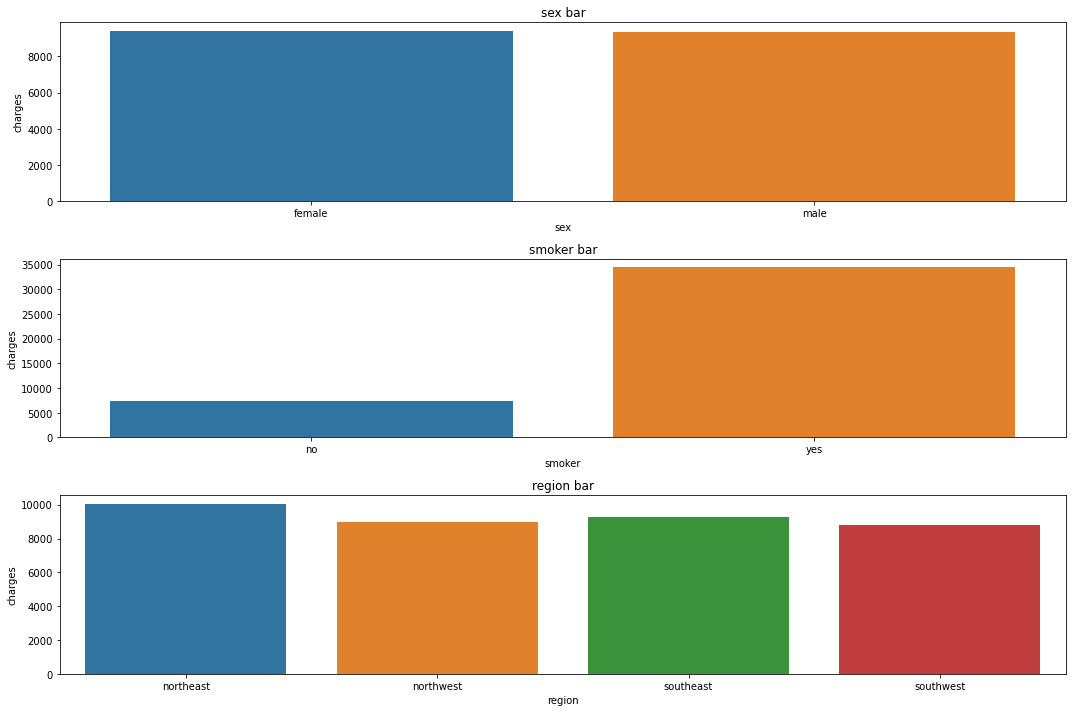

In [17]:
n = len(cat_features) #количество числовых признаков
fig, axes = plt.subplots(n, 1, figsize=(15, 10)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(cat_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    bar = sns.barplot(data=temp_data.groupby(by=feature, as_index=False)['charges'].median(), x=feature, y='charges', ax=axes[i])
    #Добавляем подпись графику
    bar.set_title('{} bar'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    bar.xaxis.set_tick_params()
plt.tight_layout() #выравнивание графиков

Вывод: прослеживается зависимость целевого признака от возраста человека и от курения.

### Кодирование категориальных признаков

In [19]:
#кодируем бинарные категориальные признаки
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
temp_data['sex'] = temp_data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
temp_data = pd.get_dummies(temp_data)
temp_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [20]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


### Подготовка к моделированию

Выделим факторы и целевой признак в отдельные таблицы:

In [22]:
features = temp_data.drop('charges', axis=1).columns
X, y = temp_data[features], temp_data['charges']

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20

In [23]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


### Обучим модель

In [24]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr.coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
print(coef_df)

           Features  Coefficients
0               age    256.975706
1               sex    -18.591692
2               bmi    337.092552
3          children    425.278784
4            smoker  23651.128856
5  region_northeast    459.585244
6  region_northwest     88.907918
7  region_southeast   -198.279052
8  region_southwest   -350.214110
9         INTERCEPT -12390.804295


### Рассчитаем метрики

In [35]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.4f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [28]:
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Train MAPE: 47


### Boxplot для визуализации ошибок

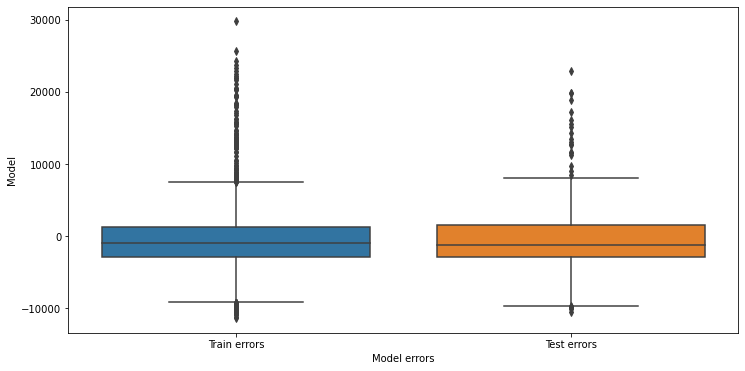

In [30]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [31]:
predict_df

,Train errors,Test errors
0,-8312.607061,NaN
1,-2101.229629,NaN
2,-2538.073290,NaN
3,18171.073994,NaN
4,-1771.112219,NaN
...,...,...
1333,-1643.341608,NaN
1334,-1248.357113,NaN
1335,-2828.506397,NaN
1336,655.485742,NaN


### Нормализуем тренировочную и тестовую выборки

In [32]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [36]:
 lr_poly = linear_model.LinearRegression()
 lr_poly.fit(X_train_scaled_poly, y_train)
 y_train_pred = lr_poly.predict(X_train_scaled_poly)
 y_test_pred = lr_poly.predict(X_test_scaled_poly)

 print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2887
Train MAPE: 29


Test R^2: 0.8668
Test MAE: 2722
Train MAPE: 30


In [38]:
print(lr_poly.coef_)

[ 3.95012092e+16  1.01006948e+14 -8.82874304e+15  1.85229734e+16
 -1.87448397e+14 -4.13705321e+13  8.19312416e+14  1.79564120e+14
 -8.55190188e+14  8.38800000e+03  7.92000000e+02  9.68000000e+02
 -1.63600000e+03  1.95000000e+02 -3.95012092e+16 -3.95012092e+16
 -3.95012092e+16 -3.95012092e+16 -1.99566908e+15  6.27000000e+02
 -1.22300000e+03  2.63000000e+02  1.89466213e+15  1.89466213e+15
  1.89466213e+15  1.89466213e+15 -9.73900000e+03  1.57900000e+03
  5.48260000e+04  8.82874304e+15  8.82874304e+15  8.82874304e+15
  8.82874304e+15 -2.05800000e+03 -2.22625000e+03 -1.85229734e+16
 -1.85229734e+16 -1.85229734e+16 -1.85229734e+16 -3.53665152e+12
  1.90985048e+14  1.90985048e+14  1.90985048e+14  1.90985048e+14
  1.15459333e+11  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.60567489e+14  0.00000000e+00  0.00000000e+00 -2.20819193e+14
  0.00000000e+00  8.13935116e+14]


In [39]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
#print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
#print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.8668
Test MAE: 2719
Train MAPE: 30


In [40]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.8633
Test MAE: 2861
Train MAPE: 31
